In [1]:
# Un poco de estadística descriptiva:

# Usaremos un subconjunto de los registros de un dataset de Kaggle que tiene datos oceanográficos 
# https://www.kaggle.com/sohier/calcofi

# El conjunto de datos de CalCOFI representa la serie cronológica más larga (desde 1949 hasta el presente) 
# y más completa (más de 50.000 estaciones de muestreo) de datos oceanográficos 
# y de larvas de peces del mundo. 

# La idea es analizar las variables numéricas de este dataset reducido (sólo cinco estaciones de muestreo) 
# calculando medidas de tendencia central, de dispersión, y de asociación entre esas variables

import numpy as np

data_location = '../Data/bottle_reducido.csv'

data_type_str = np.genfromtxt(data_location, skip_header=1, delimiter='\t', dtype= str)
data_type_str

array([['044.0 048.5', '19-4904CR-HY-087-0606-04400485-0000B-3', '0',
        '10.3', '92.8', '33.03'],
       ['044.0 048.5', '19-4904CR-HY-087-0606-04400485-0006A-3', '6',
        '18.46', '111.8', '32.92'],
       ['044.0 048.5', '19-4904CR-HY-087-0606-04400485-0010A-7', '10',
        '10.29', '95.0', '32.951'],
       ...,
       ['036.7 115.0', '19-4911BD-HY-318-2130-03671150-1100A-7', '1100',
        '3.51', '6.4', '34.44'],
       ['036.7 115.0', '19-4911BD-HY-318-2130-03671150-1200A-7', '1200',
        '3.29', '7.3', '34.481'],
       ['036.7 115.0', '19-4911BD-HY-318-2130-03671150-1247A-3', '1247',
        '3.18', '7.6', '34.5']], dtype='<U38')

In [2]:
# Sobre los datos de nivel de salinidad (columna Salinity) calculemos: media, mediana, desvio y rango:

salinity_column_index = 5
salinity_vector = data_type_str[:, salinity_column_index]
salinity_vector_numeric = salinity_vector.astype(float)

# media:
np.mean(salinity_vector_numeric)

33.601653746770026

In [3]:
# mediana: 
np.median(salinity_vector_numeric)

33.8485

In [4]:
# desvio:
np.std(salinity_vector_numeric)

0.6562158205240991

In [5]:
# rango:
np.max(salinity_vector_numeric) - np.min(salinity_vector_numeric)

2.3600000000000065

In [6]:
# Grafiquemos las distribuciones de las variables Depthm, T_degC, O2Sat, Salnty:

import seaborn as sns

def distribution_plotter(data, label, bin_width=100):    
    sns.set(rc={"figure.figsize": (7, 5)})
    sns.set_style("white")    
    dist = sns.histplot(data, stat = 'count', kde = False, 
                        line_kws = {'linewidth':5}, 
                        binwidth = bin_width)    
    dist.set_title('Distribucion ' + label + '\n', fontsize = 16)

In [7]:
# Definimos el índice para cada columna:
depthm_column_index = 2
tdegC_column_index = 3
o2sat_column_index = 4

#Convertimos los datos de cada columna a tipo flotante
depthm_vector_numeric = data_type_str[:, depthm_column_index].astype(float)
tdegC_vector_numeric = data_type_str[:, tdegC_column_index].astype(float)
o2sat_vector_numeric = data_type_str[:, o2sat_column_index].astype(float)

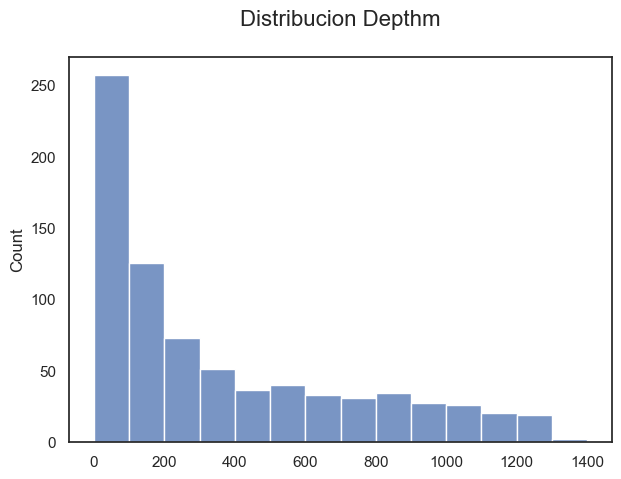

In [8]:
# Grafiquemos la distribución de la variable "Depthm", que representa la profundidad en metros:

distribution_plotter(depthm_vector_numeric, "Depthm", bin_width=100)

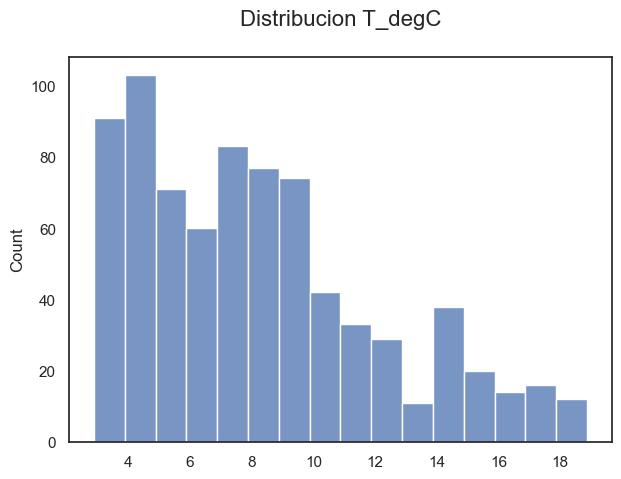

In [9]:
# Ahora hagámoslo con "T_degC" que representa la temperatura en grados centigrados:

distribution_plotter(tdegC_vector_numeric, "T_degC", bin_width=1)

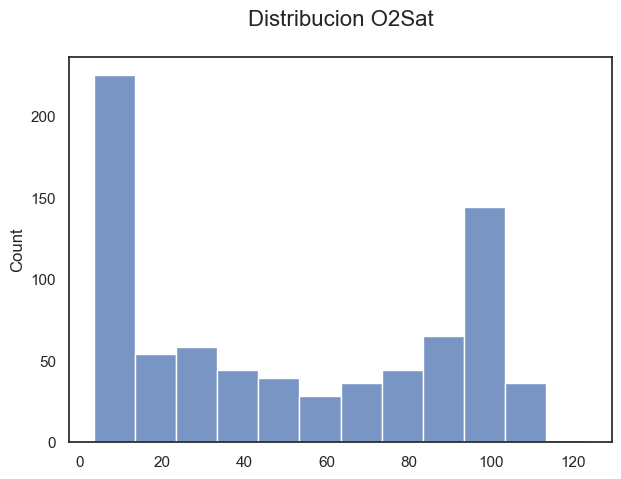

In [10]:
# "O2Sat" representa la saturación de oxígeno:

distribution_plotter(o2sat_vector_numeric, "O2Sat", bin_width=10)

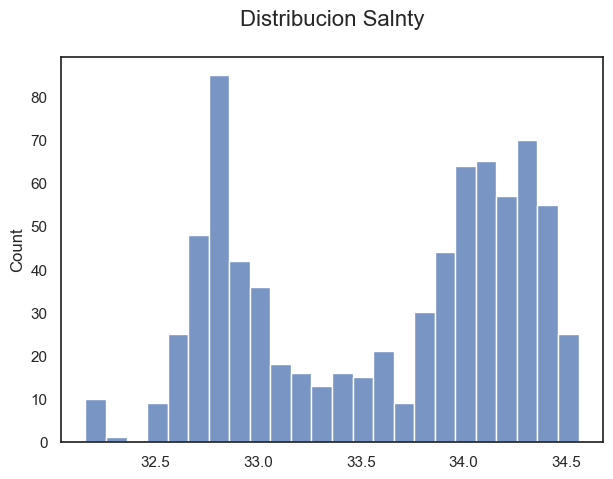

In [11]:
# "Salnty" respresenta el nivel de salinidad:

distribution_plotter(salinity_vector_numeric, "Salnty", bin_width=0.1)

In [12]:
# Calculemos las matrices de correlación y covarianza de las variables Depthm, T_degC, O2Sat, Salnty:

variables_colums_index = range(2,6)

X = data_type_str[:, variables_colums_index].astype(float)

X

array([[   0.   ,   10.3  ,   92.8  ,   33.03 ],
       [   6.   ,   18.46 ,  111.8  ,   32.92 ],
       [  10.   ,   10.29 ,   95.   ,   32.951],
       ...,
       [1100.   ,    3.51 ,    6.4  ,   34.44 ],
       [1200.   ,    3.29 ,    7.3  ,   34.481],
       [1247.   ,    3.18 ,    7.6  ,   34.5  ]])

In [13]:
# Calculamos la matriz de correlación:

correlacion = np.corrcoef(X.T)
correlacion.shape
correlacion

array([[ 1.        , -0.81016811, -0.83900896,  0.83514915],
       [-0.81016811,  1.        ,  0.8955951 , -0.91514575],
       [-0.83900896,  0.8955951 ,  1.        , -0.97048787],
       [ 0.83514915, -0.91514575, -0.97048787,  1.        ]])

In [14]:
# Calculamos la matriz de covarianza:

covarianza = np.cov(X.T)
covarianza.shape
covarianza

array([[ 1.22730122e+05, -1.11538543e+03, -1.10802454e+04,
         1.92117557e+02],
       [-1.11538543e+03,  1.54435978e+01,  1.32676236e+02,
        -2.36152167e+00],
       [-1.10802454e+04,  1.32676236e+02,  1.42106646e+03,
        -2.40228614e+01],
       [ 1.92117557e+02, -2.36152167e+00, -2.40228614e+01,
         4.31176278e-01]])

In [15]:
#  Analicemos cómo se relaciona la salinidad con otras variables para intentar predecir el valor de salinidad

xdepthm_column_index = 0
xtdegc_column_index = 1
xo2sat_column_index = 2
xsalinity_column_index = 3

In [16]:
# Creamos una lista con las covarianzas entre la salinidad y tres variables:
# añadimos el "abs" para evitar números negativos, ya que solo interesa la magnitud de la relación.

covarianzas_salinity = [ abs(covarianza[xsalinity_column_index, xdepthm_column_index]), 
                         abs(covarianza[xsalinity_column_index, xtdegc_column_index]), 
                        abs(covarianza[xsalinity_column_index, xo2sat_column_index]), 
                       ]

# Hacemos lo mismo con las correlaciones:

correlacion_salinity = [ abs(correlacion[xsalinity_column_index, xdepthm_column_index]), 
                         abs(correlacion[xsalinity_column_index, xtdegc_column_index]), 
                         abs(correlacion[xsalinity_column_index, xo2sat_column_index]), 
                       ]

# np.argmax() devuelve el índice de la covarianza con mayor valor absoluto en la lista.
# El índice será:
    # 0 → Si la mayor relación es con Profundidad
    # 1 → Si la mayor relación es con Temperatura
    # 2 → Si la mayor relación es con Oxígeno
    
np.argmax(covarianzas_salinity)

0

In [23]:
# Como vemos la variable "O2Sat" resulta más útil para predecir el valor de "Salnty" 
# porque es la que tiene el valor máximo en la matriz de correlación.